In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('precision', 9)

def eval_f(x):
    return (1 - x**2)**(-0.5)

def trapezoidal_single(x0, h):
    return h * (eval_f(x0) + eval_f(x0 + h)) / 2

def trapezoidal_composite(x0, xn, h):
    n = int((xn - x0) / h)
    X = np.linspace(x0, xn, num=n+1)
    return sum(trapezoidal_single(x0, h) for x0 in X[:-1])

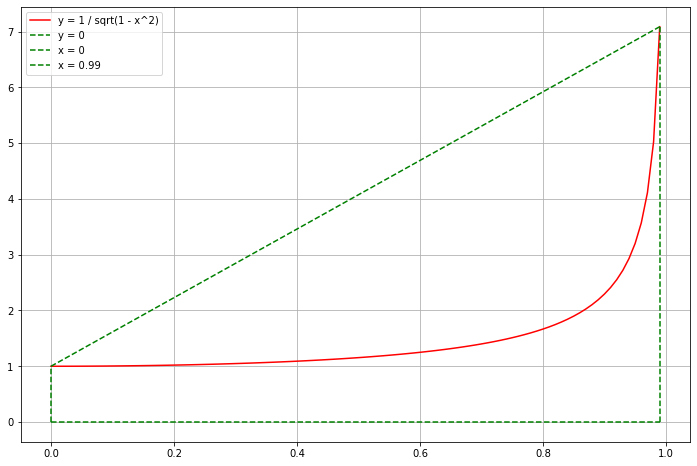


The area under the trapezoid ~ 4.003961965

The area under the red curve ~ 1.432052843 (Trapezoidal Rule with h = 0.01)

The area under the red curve = 1.429256853 (exact integral)


In [2]:
x0, xn, h = 0, 0.99, 0.01
n = int((xn - x0) / h)

X = np.linspace(x0, xn, num=n+1)
Y = [eval_f(x) for x in X]

plt.figure(figsize=[12, 8])
plt.plot(X, Y, color='r', label='y = 1 / sqrt(1 - x^2)')
plt.plot([x0, xn], [0, 0], '--', label='y = 0', color='g')
plt.plot([x0, x0], [0, eval_f(x0)], '--', label='x = 0', color='g')
plt.plot([xn, xn], [0, eval_f(xn)], '--', label='x = 0.99', color='g')
plt.plot([x0, xn], [eval_f(x0), eval_f(xn)], '--', color='g')
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

print('\nThe area under the trapezoid ~ {:.9f}'.format(trapezoidal_single(x0, xn - x0)))
 
print('\nThe area under the red curve ~ {:.9f} (Trapezoidal Rule with h = 0.01)'\
      .format(trapezoidal_composite(x0, xn, h)))
print('\nThe area under the red curve = {:.9f} (exact integral)'\
      .format(np.arcsin(xn)))

In [3]:
x0, xn, h = 0, 0.99, 0.01
D = []

for k in range(5):
    s = trapezoidal_composite(x0, xn, h)
    m = e / abs(np.arcsin(xn) - s) if k > 0 else '--'
    o = np.log(m - 2) if k > 0 else '--'
    e = abs(np.arcsin(xn) - s)
    D.append([h, s, e, m, o])
    h /= 2

In [4]:
cols = ['Step size, h', 'Comp. Trap. Rule, S(h)', 
        'Absolute Error', 'Reduced Factor', 'Order']
df = pd.DataFrame(D, columns=cols)
df

,"Step size, h","Comp. Trap. Rule, S(h)",Absolute Error,Reduced Factor,Order
0,0.010000,1.432052843,0.002795989,--,--
1,0.005000,1.429980958,0.000724104,3.86130639,0.621278602
2,0.002500,1.429439827,0.000182974,3.95742007,0.671627316
3,0.001250,1.429302728,0.000045875,3.98857198,0.687416784
4,0.000625,1.429268330,0.000011477,3.99708484,0.691688535
